In [ ]:
히트맵 상에서 상관관계가 높다고 하면 과대적합 가능성이 있음 
pclass fare -5.6

In [ ]:
pclass:Passenger Class, 승객 등급
survived: 생존 여부(생존은 1, 아닌 경우는 0)
name: 승객 이름
sex: 승객 성별
age: 승객 나이
sibsp: 동승한 형제 또는 배우자 수
parch: 동승한 부모 또는 자녀 수
ticket: 티켓 번호
fare: 승객 지불 요금
cabin: 선실 이름
embarked: 승선항(C=쉘 부르크, Q=퀸즈타운, S=사우스 햄튼)
body: 사망자 확인 번호
home.dest: 고향/목적지

In [94]:
import pandas as pd
df=pd.read_csv('./visualization/dataset/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [65]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [68]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [100]:
tmp = df['sibsp'][1]+df['parch'][1]
tmp

3

In [103]:
df['fmaily']=df['sibsp']+df['parch']
for i in range(len(df)):
    if tmp > 0:
        df['family'][i] = 1
    else:
        df['family'][i] = 0

In [104]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,fmaily
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,3
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,3
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,1
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,0


In [95]:
df.drop(['body','boat','home.dest'],axis=1,inplace=True)

In [93]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [67]:
df['sex'] = np.where(df['sex']=='male',1,0)

<AxesSubplot:>

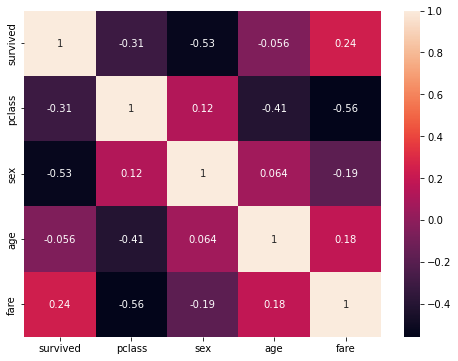

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df[['survived','pclass','sex','age','fare','embarked']].corr(),annot=True)

In [31]:
import pandas as pd
df=pd.read_csv('./visualization/dataset/titanic3.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [89]:
df1=df.groupby(['pclass','sex']).mean()
df1

survived        age     sibsp     parch        fare        body
pclass sex                                                                 
1      0    0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       1    0.340782  41.029272  0.340782  0.279330   69.888385  162.828571
2      0    0.886792  27.499223  0.500000  0.650943   23.234827   52.000000
       1    0.146199  30.815380  0.327485  0.192982   19.904946  171.233333
3      0    0.490741  22.185329  0.791667  0.731481   15.324250  183.000000
       1    0.152130  25.962264  0.470588  0.255578   12.415462  151.854167

In [84]:
import warnings
warnings.filterwarnings('ignore')



TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 720x432 with 0 Axes>

In [3]:
# name 추출
df['name_tag'] = df['name'].str.extract('( [A-Z]+\w*)', expand=False).str.strip()

In [4]:
df['name_tag'].value_counts()
#Mr 성인남성
#Miss 결혼하지 않은 여성
#Mrs 결혼 여성
#Master 결혼하지 않은 남성(청소년)

Mr             737
Miss           256
Mrs            191
Master          59
Dr               8
Rev              8
Planke           4
Col              4
Impe             3
Billiard         3
Major            2
Messemaeker      2
Ms               2
More             2
Carlo            2
Castellana       2
Gordon           2
Mlle             2
Countess         1
Pelsmaeker       1
Cruyssen         1
Steen            1
Walle            1
Velde            1
Melkebeke        1
Palmquist        1
Shawah           1
Mulder           1
Don              1
Ocana            1
Khalil           1
Rodriguez        1
Capt             1
Manent           1
Jonkheer         1
Brito            1
Mme              1
Castello         1
Name: name_tag, dtype: int64

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
 14  name_tag   1309 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [315]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_tag,age_mean_class,age_mean
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,30.338983,21.006935
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,6.984000,5.434882
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,30.338983,21.006935
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,41.730769,31.925503
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,43.606061,37.112407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Miss,17.427426,21.006935
1305,3,0,"Zabour, Miss. Thamine",female,17.427426,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Miss,17.427426,21.006935
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Mr,28.219064,31.925503
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Mr,28.219064,31.925503


In [5]:
dfg=df.groupby(['name_tag','pclass','embarked'])['age']
dfg.agg('mean')

name_tag    pclass  embarked
Billiard    3       S           26.0
Brito       2       S           32.0
Capt        1       S           70.0
Carlo       2       C           26.5
Castellana  1       C           17.5
                                ... 
Rodriguez   1       C           28.5
Shawah      3       C           30.0
Steen       3       S           28.0
Velde       3       S           33.0
Walle       3       S           28.0
Name: age, Length: 72, dtype: float64

In [314]:
df['age_mean'] = df.groupby(['name_tag'])['age'].transform('mean')

In [8]:
df['age_mean_class']=df.groupby(['name_tag','pclass','embarked'])['age'].transform('mean')

In [11]:
import numpy as np

In [12]:
df['age'] = np.where(df['age'].isnull(), df['age_mean_class'], df['age'])

In [13]:
df[df.age.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_tag,age_mean_class
524,2,1,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,9,NaN,"Spain / Havana, Cuba",Manent,NaN
1076,3,0,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,NaN,NaN,NaN,Ms,NaN
1268,3,0,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,NaN,NaN,NaN,Melkebeke,NaN


In [319]:
df.age.mean()

29.530320568754377

In [14]:
#평균값
df.age.fillna(df.age.mean(),inplace=True)

In [341]:
#삭제
df.dropna(subset=['age'], axis = 0, inplace=True) 

In [279]:
df[df.fare.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_tag,age_mean


In [15]:
df.fare.fillna(df.fare.mean(),inplace=True)

In [16]:
#삭제---필요없음
df.dropna(subset=['fare'], axis = 0, inplace=True) 

In [200]:
#삭제---악영향
import numpy as np
count, bins_divders = np.histogram(df.fare, bins=5)
print(count, bins_divders)
bin_names = [0,1,2,3,4]
df['fare_bin'] = pd.cut(x = df.fare, #데이터배열
                     bins = bins_divders,  #경계값 리스트
                     labels = bin_names,  #bin이름
                     include_lowest = True) #첫 경계값 포함
df.head(10)

[1222   46   34    0    4] [  0.      102.46584 204.93168 307.39752 409.86336 512.3292 ]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_tag,age_mean,fare_bin
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,21.784417,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,5.366923,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,21.784417,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr,32.333925,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,37.231707,1
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Mr,32.333925,0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Miss,21.784417,0
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Mr,32.333925,0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Mrs,37.231707,0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Mr,32.333925,0


In [123]:
df[df.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,name_tag,age_median


In [122]:
df.embarked.value_counts()

S    915
C    269
Q    123
Name: embarked, dtype: int64

In [17]:
df.embarked.fillna('S',inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1306 non-null   int64   
 1   survived   1306 non-null   int64   
 2   name       1306 non-null   object  
 3   sex        1306 non-null   object  
 4   age        1306 non-null   float64 
 5   sibsp      1306 non-null   int64   
 6   parch      1306 non-null   int64   
 7   ticket     1306 non-null   object  
 8   fare       1306 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1306 non-null   object  
 11  boat       485 non-null    object  
 12  body       120 non-null    float64 
 13  home.dest  744 non-null    object  
 14  name_tag   1306 non-null   object  
 15  age_mean   1306 non-null   float64 
 16  fare_bin   1306 non-null   category
dtypes: category(1), float64(4), int64(4), object(8)
memory usage: 174.9+ KB


In [18]:
df['family']=df['sibsp']+df['parch']

In [19]:
df2=df.drop(['name_tag','age_mean_class','body','boat','cabin','sibsp','parch','name','ticket','fare','home.dest'],axis=1)
df2

,pclass,survived,sex,age,embarked,family
0,1,1,female,29.000000,S,0
1,1,1,male,0.920000,S,3
2,1,0,female,2.000000,S,3
3,1,0,male,30.000000,S,3
4,1,0,female,25.000000,S,3
...,...,...,...,...,...,...
1304,3,0,female,14.500000,C,1
1305,3,0,female,9.307692,C,1
1306,3,0,male,26.500000,C,0
1307,3,0,male,27.000000,C,0


In [20]:
def get_category(age):
    cat=''
    if age <= 18: cat='0'
    elif age <= 40: cat='1'
    elif age <= 60: cat='2'
    elif age > 60: cat = '3'
    return cat
df2['cat_age'] = df2.age.apply(lambda x:get_category(x))
df2.drop(['age'],axis=1,inplace=True)

In [348]:
df2

,pclass,survived,sex,embarked,family,cat_age
0,1,1,female,S,0,Student
1,1,1,male,S,3,Baby
2,1,0,female,S,3,Baby
3,1,0,male,S,3,Student
4,1,0,female,S,3,Student
...,...,...,...,...,...,...
1304,3,0,female,C,1,Teenager
1305,3,0,female,C,1,Child
1306,3,0,male,C,0,Student
1307,3,0,male,C,0,Student


In [236]:
# df2.age=df2.age.astype(int)

In [327]:
df2

,pclass,survived,sex,embarked,family,cat_age
0,1,1,female,S,0,Student
1,1,1,male,S,3,Baby
2,1,0,female,S,3,Baby
3,1,0,male,S,3,Student
4,1,0,female,S,3,Student
...,...,...,...,...,...,...
1304,3,0,female,C,1,Teenager
1305,3,0,female,C,1,Teenager
1306,3,0,male,C,0,Student
1307,3,0,male,C,0,Student


In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
features =['sex','embarked','cat_age']
for i in features:
    df2[i] = label.fit_transform(df2[i])
df2

,pclass,survived,sex,embarked,family,cat_age
0,1,1,0,2,0,1
1,1,1,1,2,3,0
2,1,0,0,2,3,0
3,1,0,1,2,3,1
4,1,0,0,2,3,1
...,...,...,...,...,...,...
1304,3,0,0,0,1,0
1305,3,0,0,0,1,0
1306,3,0,1,0,0,1
1307,3,0,1,0,0,1


In [5]:
df=pd.read_pickle('./visualization/dataset/tdf.pkl')
df

,survived,fare_cat,age_cat,family,female,male,town_C,town_Q,town_S
0,1,1,0,0,1,0,0,0,1
1,1,1,4,3,0,1,0,0,1
2,0,1,4,3,1,0,0,0,1
3,0,1,0,3,0,1,0,0,1
4,0,1,0,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,3,1,1,0,1,0,0
1305,0,3,0,1,1,0,1,0,0
1306,0,4,0,0,0,1,1,0,0
1307,0,4,0,0,0,1,1,0,0


In [25]:
df=df2

In [26]:
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_df = df['survived'] # 종속변수
X_df = df.drop('survived',axis=1) # 독립변수

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train,X_test,y_train,y_test = train_test_split(X_df,y_df, test_size=0.2, random_state=11)

print(X_train.shape)
print(X_test.shape)

(1047, 5)
(262, 5)


In [27]:
#모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)
accuracy_rf=accuracy_score(y_test,rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr=accuracy_score(y_test,lr_pred).round(2)
# 0.85
print(f'rf 정확도 : {accuracy_rf}')

print(f'rf 정확도 : {accuracy_lr}')

rf 정확도 : 0.81
rf 정확도 : 0.82
